# Loan Data 

## Section 1: Preprocessing

- Extacting data.

- Overviewing target variable(`loan_status` column).

- Identifying a missing dataset.

- Identifying categorical and continuous dataset.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('C:\workspace\Credit-Risk-Modeling\dataset\loan_data_2007_2014\loan_data_2007_2014.csv',low_memory=False,index_col=[0])

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Eliminating useless features 

In [5]:
df.shape

(466285, 74)

In [6]:
df['initial_list_status'].value_counts()

initial_list_status
f    303005
w    163280
Name: count, dtype: int64

In [7]:
df['next_pymnt_d'].isna().value_counts()

next_pymnt_d
False    239071
True     227214
Name: count, dtype: int64

In [8]:
df['policy_code'].value_counts()

policy_code
1    466285
Name: count, dtype: int64

In [9]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [10]:
eliminated_feature=['id', 'member_id','grade', 'sub_grade', 'emp_title','pymnt_plan', 'url','desc', 'purpose',
       'title','policy_code','addr_state']
df.drop(eliminated_feature,axis=1,inplace=True)


### Eliminating columns with too many missing values

In [11]:
df.shape

(466285, 62)

In [12]:
missing_features_list=[]
for i in df.columns:
    if df[i].isna().any()==True:
        a=df[i].isna().sum()/len(df)
        if a>=0.1:
            missing_features_list.append(i)
        #print((i,df[i].isna().sum()/len(df)))

#df=df.drop(missing_features_list,axis=1,inplace=True)

In [13]:
df.drop(missing_features_list,axis=1,inplace=True)

In [14]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,860xx,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,309xx,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,606xx,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,917xx,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,972xx,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,INDIVIDUAL,0.0


In [15]:
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

### target variable preparation

In [16]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [17]:
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']), 0, 1)

In [18]:
df['loan_status'].value_counts(normalize=True)

loan_status
1    0.890693
0    0.109307
Name: proportion, dtype: float64

### datetime columns
- `issue_d`, `earliest_cr_line`, `last_pymnt_d` and `last_credit_pull_d`  are considered to be a datetime.

-  `make_date` dataset.
"

In [19]:
dateTime=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

In [20]:
def make_date(df,col_name_list):
    for col_name in col_name_list:
        for i in df.index:
            try:
                year=df.loc[i,col_name].split('-')[1]
                df.loc[i,col_name]=year
            except :
                '''error'''
    return df

In [21]:
df.loc[df.isna().any(axis=1),dateTime]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
26,Dec-11,Oct-03,NaN,Jan-16
168,Dec-11,Aug-94,Dec-13,Jan-16
323,Dec-11,Mar-03,Sep-15,Sep-15
394,Dec-11,Feb-05,May-12,May-12
422,Dec-11,Apr-93,Jan-12,Jun-12
...,...,...,...,...
466254,Jan-14,Jan-84,Apr-14,Jan-16
466256,Jan-14,Apr-01,Nov-14,Jan-16
466262,Jan-14,Feb-93,Aug-15,Jan-16
466265,Jan-14,Jul-93,Apr-15,Dec-15


In [22]:
df.loc[df.isna().any(axis=1),'earliest_cr_line']='17'
df.loc[df.isna().any(axis=1), 'last_pymnt_d']='17'
df.loc[df.isna().any(axis=1),'last_credit_pull_d']='17'

In [23]:
df['issue_d']=df['issue_d'].str.extract('(\d+)').astype(int)
df['earliest_cr_line']=df['earliest_cr_line'].str.extract('(\d+)').astype(int)
df['last_pymnt_d']=df['last_pymnt_d'].str.extract('(\d+)').astype(int)
df['last_credit_pull_d']=df['last_credit_pull_d'].str.extract('(\d+)').astype(int)

<Axes: >

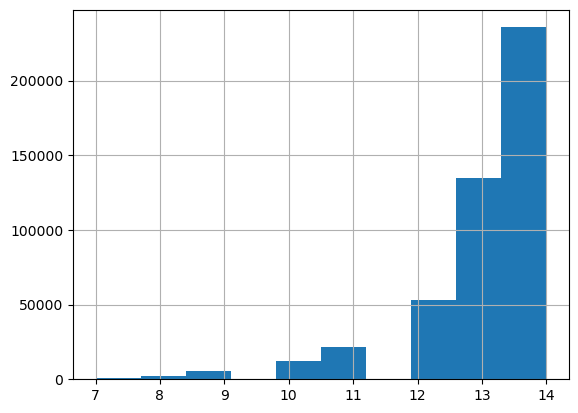

In [24]:
df['issue_d'].hist()

In [25]:
df['issue_d']=df['issue_d']+2000

<Axes: >

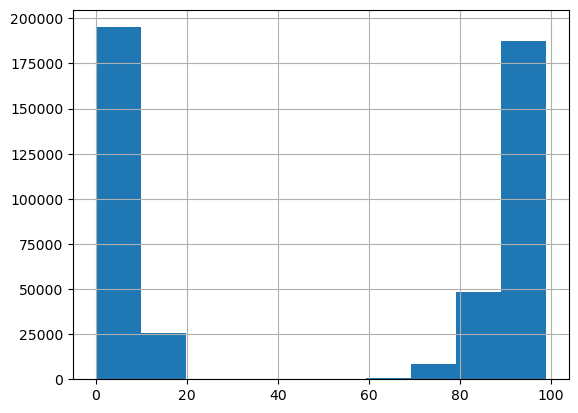

In [26]:
df['earliest_cr_line'].hist()

<Axes: >

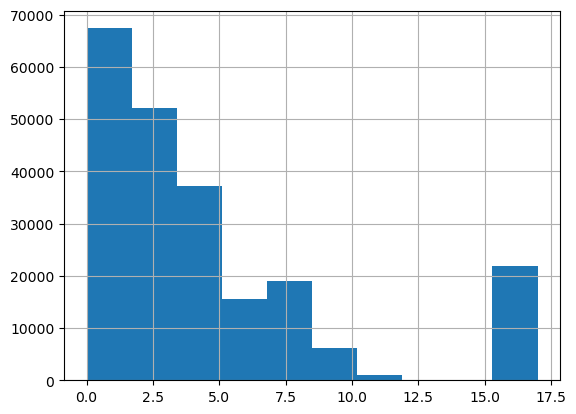

In [27]:
df.loc[df['earliest_cr_line']<40,'earliest_cr_line'].hist()

In [28]:
df.loc[df['earliest_cr_line']<40]['earliest_cr_line'].describe()

count    220558.000000
mean          4.543667
std           4.828774
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          17.000000
Name: earliest_cr_line, dtype: float64

In [29]:
df.loc[df['earliest_cr_line']>40]['earliest_cr_line'].describe()

count    245727.000000
mean         92.831923
std           5.927020
min          44.000000
25%          90.000000
50%          95.000000
75%          97.000000
max          99.000000
Name: earliest_cr_line, dtype: float64

In [30]:
df.loc[df['earliest_cr_line']<40,'earliest_cr_line']=2000+df.loc[df['earliest_cr_line']<40,'earliest_cr_line']
df.loc[(df['earliest_cr_line']>40) & (df['earliest_cr_line']<2000),'earliest_cr_line']=1900+df.loc[(df['earliest_cr_line']>40) & (df['earliest_cr_line']<2000),'earliest_cr_line']

<Axes: >

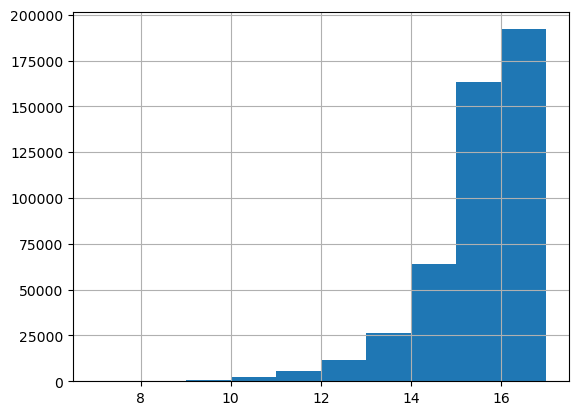

In [31]:
df['last_pymnt_d'].hist()

In [32]:
df['last_pymnt_d']=2000+df['last_pymnt_d']

<Axes: >

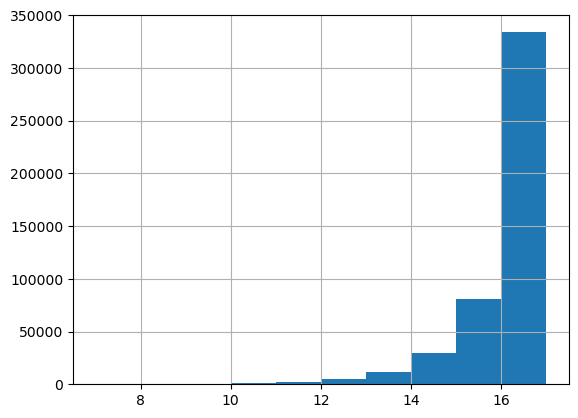

In [33]:
df['last_credit_pull_d'].hist()

In [34]:
df['last_credit_pull_d']=df['last_credit_pull_d']+2000

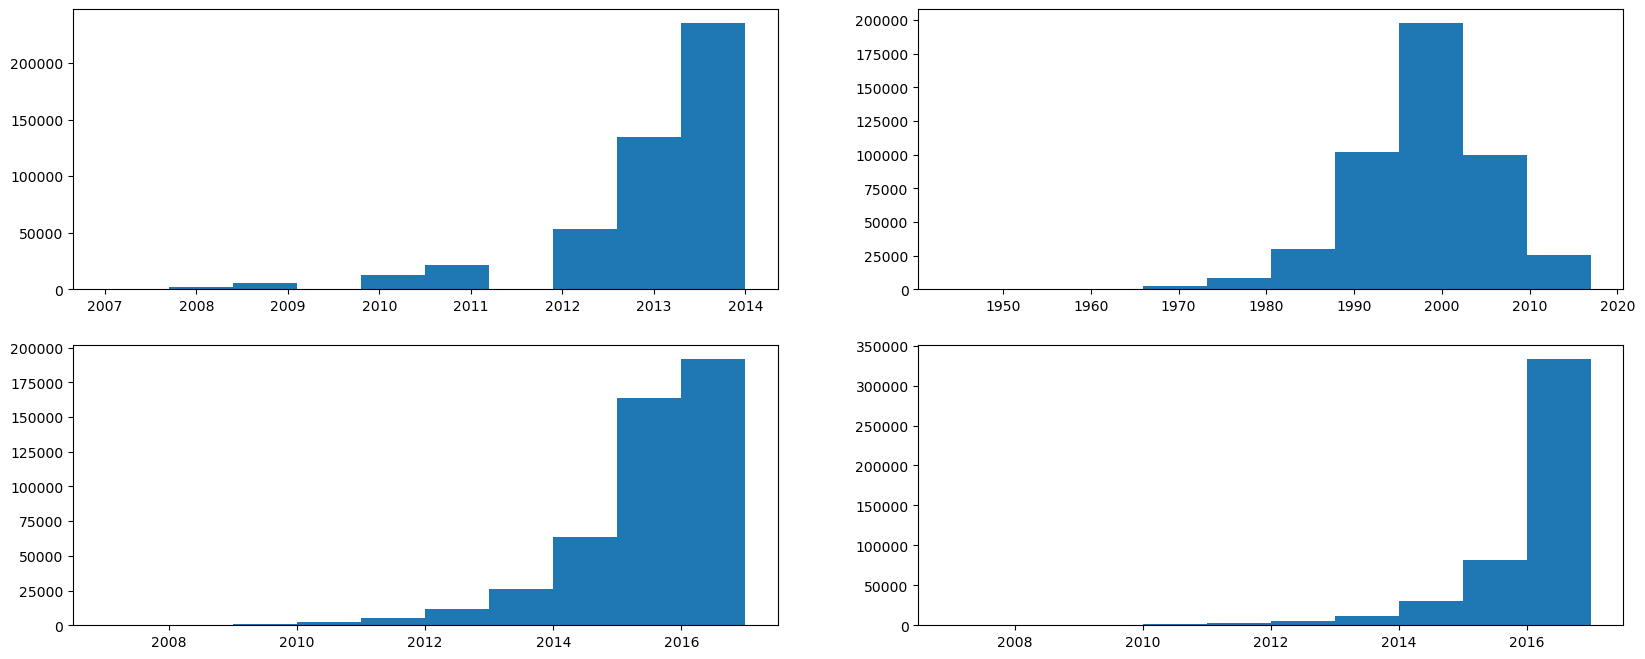

In [35]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,8))
ax[0,0].hist(df['issue_d'])
ax[0,1].hist(df['earliest_cr_line'])
ax[1,0].hist(df['last_pymnt_d'])
ax[1,1].hist(df['last_credit_pull_d'])
plt.show()

### Handling Categorical Data

In [36]:
def cross_tab_maker(x):
    cross_temp=pd.crosstab(df['loan_status'],df[x])
    for i in cross_temp.columns:
        cross_temp[i]=cross_temp[i]/cross_temp[i].sum()
    return cross_temp

In [37]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,2011,1,860xx,27.65,0.0,1985,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015,171.62,2016,0.0,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,2011,0,309xx,1.00,0.0,1999,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013,119.66,2013,0.0,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,Not Verified,2011,1,606xx,8.72,0.0,2001,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014,649.91,2016,0.0,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,Source Verified,2011,1,917xx,20.00,0.0,1996,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015,357.48,2015,0.0,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,Source Verified,2011,1,972xx,17.94,0.0,1996,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016,67.79,2016,0.0,INDIVIDUAL,0.0


In [38]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'zip_code', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq'],
      dtype='object')

In [39]:
category_feature=['term', 'emp_length', 'home_ownership','verification_status','initial_list_status','application_type']
df[category_feature]

,term,emp_length,home_ownership,verification_status,initial_list_status,application_type
0,36 months,10+ years,RENT,Verified,f,INDIVIDUAL
1,60 months,< 1 year,RENT,Source Verified,f,INDIVIDUAL
2,36 months,10+ years,RENT,Not Verified,f,INDIVIDUAL
3,36 months,10+ years,RENT,Source Verified,f,INDIVIDUAL
4,60 months,1 year,RENT,Source Verified,f,INDIVIDUAL
...,...,...,...,...,...,...
466280,60 months,4 years,MORTGAGE,Source Verified,w,INDIVIDUAL
466281,60 months,10+ years,MORTGAGE,Verified,f,INDIVIDUAL
466282,60 months,7 years,MORTGAGE,Verified,f,INDIVIDUAL
466283,36 months,3 years,OWN,Verified,w,INDIVIDUAL


In [40]:
df[category_feature].isna().any()

term                   False
emp_length              True
home_ownership         False
verification_status    False
initial_list_status    False
application_type       False
dtype: bool

In [41]:
df[category_feature].isna().sum()

term                       0
emp_length             21008
home_ownership             0
verification_status        0
initial_list_status        0
application_type           0
dtype: int64

#### Prepocessing `term`

- months are eliminated.

In [42]:
df['term']=df['term'].str.replace(' months','')
df['term']=df['term'].astype(int)

In [43]:
cross_tab_maker('term')

term,36,60
loan_status,,
0,0.097085,0.141492
1,0.902915,0.858508


#### Preprocessing `emp_length`

- First, we need to handle missing data in `emp_length`.

- missing `emp_length` are replaced with zero

In [44]:
df[df['emp_length'].isna()==True]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
168,2500,2500,2500.0,36,7.51,77.78,NaN,OWN,12000.0,Source Verified,2011,0,961xx,16.30,0.0,2017,2.0,13.0,0.0,4853,42.2,20.0,f,0.0,0.0,1838.880000,1838.88,1575.06,253.74,0.0,10.08,0.0000,2017,77.78,2017,0.0,INDIVIDUAL,0.0
323,18000,18000,18000.0,60,17.58,452.98,NaN,MORTGAGE,60000.0,Verified,2011,1,363xx,21.96,0.0,2017,1.0,11.0,0.0,5945,83.7,28.0,f,0.0,0.0,26369.525520,26369.53,18000.00,8369.53,0.0,0.00,0.0000,2017,6909.59,2017,0.0,INDIVIDUAL,0.0
394,4000,4000,4000.0,36,11.71,132.31,NaN,RENT,24000.0,Source Verified,2011,1,328xx,7.50,1.0,2017,0.0,4.0,0.0,1593,54.9,6.0,f,0.0,0.0,4185.930000,4185.93,4000.00,185.93,0.0,0.00,0.0000,2017,3658.15,2017,0.0,INDIVIDUAL,0.0
422,1000,1000,1000.0,36,14.65,34.50,NaN,RENT,18408.0,Not Verified,2011,0,080xx,6.00,0.0,2017,2.0,3.0,1.0,2510,83.7,8.0,f,0.0,0.0,91.310000,91.31,22.24,12.18,0.0,56.89,10.2402,2017,34.50,2017,0.0,INDIVIDUAL,0.0
439,8250,8250,8250.0,36,7.51,256.67,NaN,MORTGAGE,31500.0,Verified,2011,1,218xx,17.87,0.0,2017,4.0,17.0,0.0,7521,10.4,37.0,f,0.0,0.0,9236.369059,9236.37,8250.00,986.37,0.0,0.00,0.0000,2017,278.92,2017,0.0,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466254,6000,6000,6000.0,60,23.40,170.53,NaN,MORTGAGE,45600.0,Source Verified,2014,0,317xx,1.50,1.0,2017,0.0,3.0,0.0,1199,14.6,13.0,f,0.0,0.0,511.490000,511.49,163.71,347.78,0.0,0.00,0.0000,2017,170.53,2017,0.0,INDIVIDUAL,0.0
466256,15000,15000,15000.0,36,16.99,534.72,NaN,RENT,50000.0,Source Verified,2014,0,196xx,24.39,0.0,2017,0.0,14.0,0.0,24551,83.8,34.0,f,0.0,0.0,5347.100000,5347.10,3436.71,1910.39,0.0,0.00,0.0000,2017,534.72,2017,0.0,INDIVIDUAL,0.0
466262,14000,14000,14000.0,36,16.24,493.86,NaN,MORTGAGE,68000.0,Verified,2014,1,080xx,25.36,1.0,2017,0.0,19.0,0.0,14145,58.0,47.0,f,0.0,0.0,16935.850130,16935.85,14000.00,2935.85,0.0,0.00,0.0000,2017,8046.50,2017,0.0,INDIVIDUAL,0.0
466265,32000,32000,31975.0,36,7.90,1001.29,NaN,MORTGAGE,128000.0,Source Verified,2014,1,920xx,5.65,0.0,2017,1.0,11.0,0.0,5400,17.5,35.0,f,0.0,0.0,34606.234310,34579.20,32000.00,2606.23,0.0,0.00,0.0000,2017,20463.91,2017,0.0,INDIVIDUAL,0.0


In [45]:
df['emp_length'].fillna('unknown',inplace=True)
df['emp_length'].value_counts()

emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
unknown       21008
9 years       17888
Name: count, dtype: int64

In [46]:
cross_tab_maker('emp_length')

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,unknown
loan_status,,,,,,,,,,,,
0,0.111876,0.099647,0.109758,0.10952,0.109589,0.114967,0.117111,0.111345,0.110069,0.112086,0.118985,0.132616
1,0.888124,0.900353,0.890242,0.89048,0.890411,0.885033,0.882889,0.888655,0.889931,0.887914,0.881015,0.867384


#### `verification_status`

In [47]:
cross_tab_maker('verification_status')

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
0,0.094079,0.104118,0.127369
1,0.905921,0.895882,0.872631


#### `initial_list_status `

In [48]:
cross_tab_maker('initial_list_status')

initial_list_status,f,w
loan_status,,
0,0.120308,0.08889
1,0.879692,0.91111


#### `application_type`

In [49]:
cross_tab_maker('application_type')

application_type,INDIVIDUAL
loan_status,
0,0.109307
1,0.890693


In [50]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    466285
Name: count, dtype: int64

In [51]:
category_feature=['term', 'emp_length', 'home_ownership','verification_status','initial_list_status']
df.drop('application_type',axis=1,inplace=True)

In [52]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq
0,5000,5000,4975.0,36,10.65,162.87,10+ years,RENT,24000.0,Verified,2011,1,860xx,27.65,0.0,1985,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015,171.62,2016,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,2011,0,309xx,1.00,0.0,1999,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013,119.66,2013,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,2011,1,606xx,8.72,0.0,2001,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014,649.91,2016,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,10+ years,RENT,49200.0,Source Verified,2011,1,917xx,20.00,0.0,1996,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015,357.48,2015,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,1 year,RENT,80000.0,Source Verified,2011,1,972xx,17.94,0.0,1996,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016,67.79,2016,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60,14.47,432.64,4 years,MORTGAGE,110000.0,Source Verified,2014,1,773xx,19.85,0.0,2003,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,2016,432.64,2016,0.0,0.0
466281,22000,22000,22000.0,60,19.97,582.50,10+ years,MORTGAGE,78000.0,Verified,2014,0,377xx,18.45,0.0,1997,5.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,2014,17.50,2016,0.0,0.0
466282,20700,20700,20700.0,60,16.99,514.34,7 years,MORTGAGE,46000.0,Verified,2014,1,458xx,25.65,0.0,2001,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,2016,514.34,2015,0.0,0.0
466283,2000,2000,2000.0,36,7.90,62.59,3 years,OWN,83000.0,Verified,2014,1,913xx,5.39,3.0,2003,1.0,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,2014,1500.68,2015,0.0,0.0


In [53]:
df_category=df[category_feature]

### Handling Continuos Dataset

In [54]:
len(df['zip_code'].unique())

888

<Axes: >

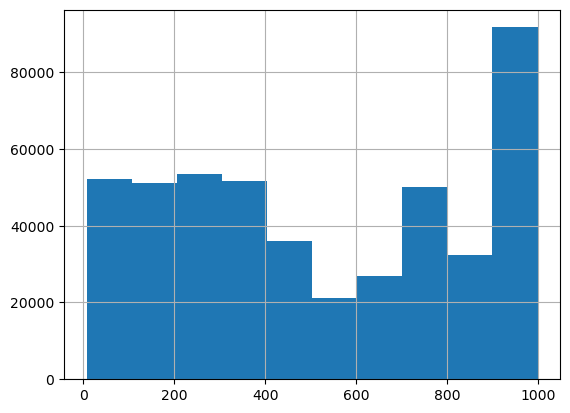

In [55]:
df['zip_code']=df['zip_code'].str.replace('xx','')
df['zip_code']=df['zip_code'].astype(int)
df['zip_code'].hist()

- Potential numerical features are identified.

In [56]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq
0,5000,5000,4975.0,36,10.65,162.87,10+ years,RENT,24000.0,Verified,2011,1,860,27.65,0.0,1985,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015,171.62,2016,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,2011,0,309,1.00,0.0,1999,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013,119.66,2013,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,2011,1,606,8.72,0.0,2001,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014,649.91,2016,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,10+ years,RENT,49200.0,Source Verified,2011,1,917,20.00,0.0,1996,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015,357.48,2015,0.0,0.0
4,3000,3000,3000.0,60,12.69,67.79,1 year,RENT,80000.0,Source Verified,2011,1,972,17.94,0.0,1996,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016,67.79,2016,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60,14.47,432.64,4 years,MORTGAGE,110000.0,Source Verified,2014,1,773,19.85,0.0,2003,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,2016,432.64,2016,0.0,0.0
466281,22000,22000,22000.0,60,19.97,582.50,10+ years,MORTGAGE,78000.0,Verified,2014,0,377,18.45,0.0,1997,5.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,2014,17.50,2016,0.0,0.0
466282,20700,20700,20700.0,60,16.99,514.34,7 years,MORTGAGE,46000.0,Verified,2014,1,458,25.65,0.0,2001,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,2016,514.34,2015,0.0,0.0
466283,2000,2000,2000.0,36,7.90,62.59,3 years,OWN,83000.0,Verified,2014,1,913,5.39,3.0,2003,1.0,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,2014,1500.68,2015,0.0,0.0


In [57]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'zip_code', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq'],
      dtype='object')

In [58]:
numerical_feature=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate','installment','annual_inc','zip_code', 'dti','delinq_2yrs','inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc','out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','collections_12_mths_ex_med', 'acc_now_delinq']
df_num=df[numerical_feature]

In [59]:
df_num.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466285.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466256.000000
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,513.383476,17.218758,0.284678,0.804745,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,0.009085,0.004002
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,316.325937,7.851121,0.797365,1.091598,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,0.108648,0.068637
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,223.000000,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,480.000000,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,815.000000,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,999.000000,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,20.000000,5.000000


In [60]:
df['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0     462226
1.0       3665
2.0        219
3.0         19
4.0          7
6.0          1
16.0         1
20.0         1
5.0          1
Name: count, dtype: int64

In [61]:
df['acc_now_delinq'].value_counts()

acc_now_delinq
0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: count, dtype: int64

- `collection_12_mths_ex_med` and `acc_now_delinq` behaves similar to ccategorical variable.

In [62]:
cross_tab_maker('collections_12_mths_ex_med')

collections_12_mths_ex_med,0.0,1.0,2.0,3.0,4.0,5.0,6.0,16.0,20.0
loan_status,,,,,,,,,
0,0.109414,0.096044,0.059361,0.0,0.142857,0.0,0.0,0.0,0.0
1,0.890586,0.903956,0.940639,1.0,0.857143,1.0,1.0,1.0,1.0


In [63]:
cross_tab_maker('acc_now_delinq')

acc_now_delinq,0.0,1.0,2.0,3.0,4.0,5.0
loan_status,,,,,,
0,0.109316,0.106593,0.097826,0.181818,0.0,0.5
1,0.890684,0.893407,0.902174,0.818182,1.0,0.5


- updating numerical features after removal of `collection_12_mths_ex_med` and `acc_now_delinq`.

In [64]:
numerical_feature=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate','installment','annual_inc','zip_code', 'dti','delinq_2yrs','inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc','out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

#### Overview of the selected categorical features

In [65]:
df[category_feature]

,term,emp_length,home_ownership,verification_status,initial_list_status
0,36,10+ years,RENT,Verified,f
1,60,< 1 year,RENT,Source Verified,f
2,36,10+ years,RENT,Not Verified,f
3,36,10+ years,RENT,Source Verified,f
4,60,1 year,RENT,Source Verified,f
...,...,...,...,...,...
466280,60,4 years,MORTGAGE,Source Verified,w
466281,60,10+ years,MORTGAGE,Verified,f
466282,60,7 years,MORTGAGE,Verified,f
466283,36,3 years,OWN,Verified,w


In [66]:
df['emp_length'].value_counts()

emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
unknown       21008
9 years       17888
Name: count, dtype: int64

In [67]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: count, dtype: int64

In [68]:
df.loc[(df['home_ownership']=='ANY') | (df['home_ownership']=='NONE'),'home_ownership']='OTHER'

In [69]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: count, dtype: int64

### Final Investigation of missing variables in dataset

In [70]:
df=df[numerical_feature+category_feature+['loan_status']]
df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,earliest_cr_line,last_pymnt_d,last_credit_pull_d,term,emp_length,home_ownership,verification_status,initial_list_status,loan_status
0,5000,5000,4975.0,10.65,162.87,24000.0,860,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,1985,2015,2016,36,10+ years,RENT,Verified,f,1
1,2500,2500,2500.0,15.27,59.83,30000.0,309,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,1999,2013,2013,60,< 1 year,RENT,Source Verified,f,0
2,2400,2400,2400.0,15.96,84.33,12252.0,606,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2001,2014,2016,36,10+ years,RENT,Not Verified,f,1
3,10000,10000,10000.0,13.49,339.31,49200.0,917,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,1996,2015,2015,36,10+ years,RENT,Source Verified,f,1
4,3000,3000,3000.0,12.69,67.79,80000.0,972,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,1996,2016,2016,60,1 year,RENT,Source Verified,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,110000.0,773,19.85,0.0,2.0,18.0,0.0,23208,77.6,36.0,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,2003,2016,2016,60,4 years,MORTGAGE,Source Verified,w,1
466281,22000,22000,22000.0,19.97,582.50,78000.0,377,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,1997,2014,2016,60,10+ years,MORTGAGE,Verified,f,0
466282,20700,20700,20700.0,16.99,514.34,46000.0,458,25.65,0.0,2.0,18.0,0.0,6688,51.1,43.0,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,2001,2016,2015,60,7 years,MORTGAGE,Verified,f,1
466283,2000,2000,2000.0,7.90,62.59,83000.0,913,5.39,3.0,1.0,21.0,0.0,11404,21.5,27.0,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,2003,2014,2015,36,3 years,OWN,Verified,w,1


In [71]:
pd.DataFrame(df.isna().sum(),columns=['number of missing variable']).sort_values('number of missing variable',ascending=False).head(7)

,number of missing variable
revol_util,340
open_acc,29
total_acc,29
delinq_2yrs,29
inq_last_6mths,29
pub_rec,29
annual_inc,4


## Section 2: Data preparation for model buidling

- Train and test splits;

- Hotencoding of categorical features;

- Power transformation of numerical features;

- Imputation of missing variables;

- Target engieering;

### Section 2.1: Train and test splits

- The data is stratified.

In [72]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42,stratify=df['loan_status'])

In [73]:
train_df['loan_status'].value_counts(normalize=True)

loan_status
1    0.890695
0    0.109305
Name: proportion, dtype: float64

In [74]:
test_df['loan_status'].value_counts(normalize=True)

loan_status
1    0.890689
0    0.109311
Name: proportion, dtype: float64

In [75]:
len(train_df),len(test_df)

(373028, 93257)

### Onehot encoder

In [76]:
X_cat_train=train_df[category_feature]
X_cat_test=test_df[category_feature]

In [77]:
from sklearn.preprocessing import OneHotEncoder 
ohe=OneHotEncoder().fit(X_cat_train)
X_cat_train=ohe.transform(X_cat_train).toarray()
X_cat_test=ohe.transform(X_cat_test).toarray()

In [78]:
X_cat_train.shape,X_cat_test.shape

((373028, 23), (93257, 23))

### Scaling of the dataset

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(train_df[numerical_feature])
X_num_train=scaler.transform(train_df[numerical_feature])
X_num_test=scaler.transform(test_df[numerical_feature])

In [80]:
X_num_train.shape,X_num_test.shape

((373028, 27), (93257, 27))

### Imputation

In [81]:
from sklearn.impute import KNNImputer 
knn_imput=KNNImputer().fit(X_num_train)
X_num_train=knn_imput.transform(X_num_train)
X_num_test=knn_imput.transform(X_num_test)

### Target engineering

In [82]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder().fit(train_df['loan_status'])
y_train=le.transform(train_df['loan_status'])
y_test=le.transform(test_df['loan_status'])

In [83]:
pd.Series(y_train).value_counts(normalize=True)

1    0.890695
0    0.109305
Name: proportion, dtype: float64

In [84]:
pd.Series(y_test).value_counts(normalize=True)

1    0.890689
0    0.109311
Name: proportion, dtype: float64

### Putting it all together

In [85]:
train_np=pd.DataFrame(np.concatenate((X_num_train,X_cat_train,y_train.reshape((-1,1))),axis=1))
test_np=pd.DataFrame(np.concatenate((X_num_test,X_cat_test,y_test.reshape((-1,1))),axis=1))

In [86]:
train_np.shape

(373028, 51)

In [87]:
test_np.shape

(93257, 51)

In [88]:
train_np.to_csv('C:\\workspace\\Credit-Risk-Modeling\\dataset\\loan_data_2007_2014\\train_df.csv')
test_np.to_csv('C:\\workspace\\Credit-Risk-Modeling\\dataset\\loan_data_2007_2014\\test_df.csv')